In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Load dataset
file_path = 'adult_with_headers.csv'
data = pd.read_csv(file_path)
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [21]:
# Data Exploration
print("Summary Statistics:\n", data.describe())
print("\nMissing Values:\n", data.isnull().sum())
print("\nData Types:\n", data.dtypes)

Summary Statistics:
                 age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Missing Values:
 age               0
work

In [23]:
# Handle Missing Values (Imputation or Removal)
data = data.dropna()  # For simplicity, removing rows with missing values
print("\nAfter Handling Missing Values:\n", data.isnull().sum())


After Handling Missing Values:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [25]:
# Scaling Numerical Features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

In [27]:
# Standard Scaling
scaler_standard = StandardScaler()
data_scaled_standard = scaler_standard.fit_transform(data[numerical_features])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_scaled_minmax = scaler_minmax.fit_transform(data[numerical_features])

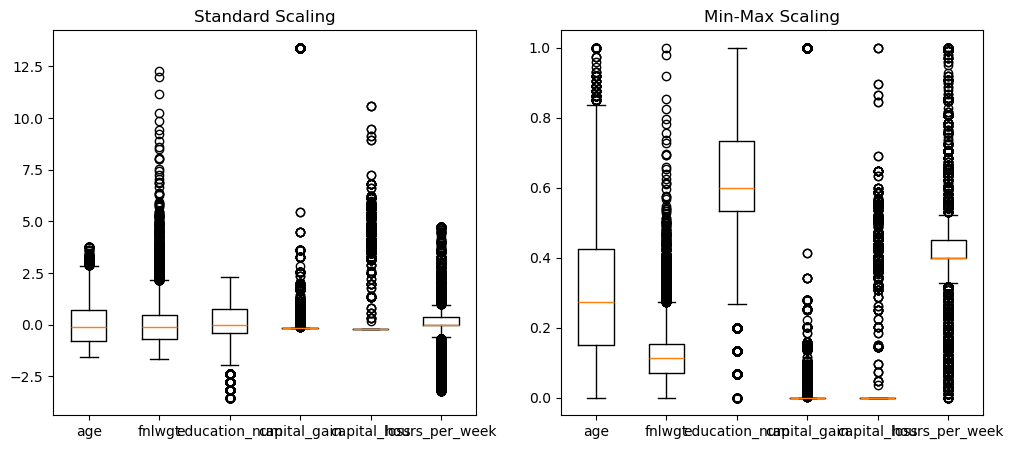

In [29]:
# Visualization of Scaling Techniques
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(data_scaled_standard, labels=numerical_features)
plt.title("Standard Scaling")
plt.subplot(1, 2, 2)
plt.boxplot(data_scaled_minmax, labels=numerical_features)
plt.title("Min-Max Scaling")
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# One-Hot Encoding
one_hot_features = [col for col in categorical_features if data[col].nunique() < 5]
data_one_hot = pd.get_dummies(data, columns=one_hot_features)

# Label Encoding
label_encoder = LabelEncoder()
for col in categorical_features:
    if data[col].nunique() >= 5:
        data[col] = label_encoder.fit_transform(data[col])

print("\nData After Encoding:\n", data.head())


Data After Encoding:
    age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race      sex  capital_gain  capital_loss  \
0           1             1     4     Male          2174             0   
1           4             0     4     Male             0             0   
2           6             1     4     Male             0             0   
3           6             0     2     Male             0             0   
4          10             5     2   Female             0             0   

   hours_per_week  native_country  income  
0              40              39   <=50K  
1              13

In [43]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Step 3: Feature Engineering
data["capital_total"] = data["capital_gain"] - data["capital_loss"]
data["income_per_hour"] = data["capital_total"] / data["hours_per_week"]
data["income_per_hour"].replace([np.inf, -np.inf], 0, inplace=True)  # Handling division by zero

# Applying log transformation to capital_gain
data["log_capital_gain"] = np.log1p(data["capital_gain"])



C:\Users\Kaushal\AppData\Local\Temp\ipykernel_2740\2786776026.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["income_per_hour"].replace([np.inf, -np.inf], 0, inplace=True)  # Handling division by zero


In [39]:
# Step 4: Feature Selection - Outlier Detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(data[numerical_features])
data_filtered = data[outliers == 1]  # Removing detected outliers

print(f"Outliers removed: {data.shape[0] - data_filtered.shape[0]}")


Outliers removed: 326
